## Perceptron using Scikit-learn
___

### The PalmerPenguins dataset

The PalmerPenguins dataset contains data about 3 species of penguins collected from 3 islands in the Palmer Archipelago, Antarctica. For more information about this dataset you can find it [here](https://allisonhorst.github.io/palmerpenguins/).

The variables we will be using in this notebook are:
- species: Penguin species: "Adelie", "Gentoo", or "Chinstrap"
- bill_depth_mm: Penguin bill depth in millimeters
- bill_length_mm: Penguin bill length in millimeters

We will use Scikit-learn to create a perceptron to classify penguins as Adelie or Gentoo based on the depth and length of their bills.
___

In this notebook we will use the following libraries:
- [palmerpenguins]()
- [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
- sklearn
    - [linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
    - [model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - [metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
___

In [56]:
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
# load the palmer penguins dataset and remove na values
penguins = load_penguins().dropna()

In [128]:
x_data = [x for x in zip(penguins.bill_depth_mm[0:265], penguins.bill_length_mm[0:265])]
y_data = [1 if y == "Adelie" else -1 for y in penguins.species[0:265]]

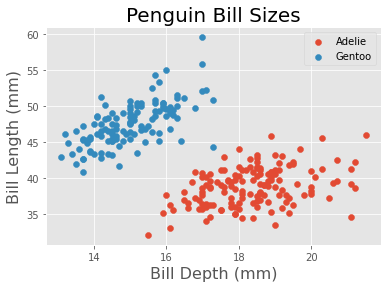

In [216]:
fig, ax = plt.subplots()
ax.scatter(*zip(*x_data[0:146]), label="Adelie")
ax.scatter(*zip(*x_data[146:265]), label="Gentoo")
ax.set_title("Penguin Bill Sizes", fontsize=20)
ax.set_xlabel("Bill Depth (mm)", fontsize=16)
ax.set_ylabel("Bill Length (mm)", fontsize=16)
ax.legend()
plt.show()

In [211]:
# Partition data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3)

In [212]:
# Create Perceptron object with epochs = 1
clf = Perceptron(max_iter=1)

# Fit model with Stochastic Gradient Descent
clf.fit(train_x, train_y)

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [213]:
clf.score(train_x, train_y)

1.0

In [214]:
pred_y = clf.predict(test_x)

In [215]:
print('Accuracy: %.2f' % accuracy_score(test_y, pred_y))

Accuracy: 1.00
